## Lab 6

Welcome to lab 6! In this lab, we revisit sampling and consider some basic statistical inference.

As usual, **run the cell below** to prepare the lab.

In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Pandas modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Monty Hall Problem
This problem has flummoxed many people over the years, mathematicians included. Let’s see if we can work it out by simulation.

The setting is derived from a television game show called “Let’s Make a Deal”. Monty Hall hosted this show in the 1960’s, and it has since led to a number of spin-offs. An exciting part of the show was that while the contestants had the chance to win great prizes, they might instead end up with “zonks” that were less desirable. This is the basis for what is now known as the Monty Hall problem.

The setting is a game show in which the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn’t know where the car is, and has to attempt to find it under the following rules.

The contestant makes an initial choice, but that door isn’t opened.
At least one of the other two doors must have a goat behind it. Monty opens one of these doors to reveal a goat:

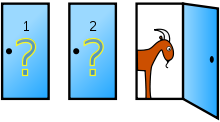

There are two doors left, one of which was the contestant’s original choice. One of the doors has the car behind it, and the other one has a goat. The contestant now gets to choose which of the two doors to open.

The contestant has a decision to make. Which door should she choose to open, if she wants the car? Should she stick with her initial choice, or switch to the other door? That is the Monty Hall problem.

### The Solution

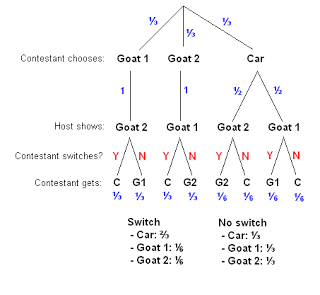

Intuition suggests that switching doors would not improve one's chances. However, let us examine the diagram above. Assuming that any door is equally likely to contain the car (your original guess starts off with a 1/3 chance of being correct), we see that switching doors wins the car 2/3 of the time, while staying with the current door only wins the car 1/3 of the time.

Why is this the case? This is because the reveal of a door with a goat behind it provides new information that makes the new door slightly more attractive. To illustrate this, imagine that the problem is posed instead as follows: you are given 100 doors to choose between, behind 99 of which are goats, and behind 1 of which is a car. Once you choose a door, the host will reveal the goats behind 98 of the other doors, leaving you with your original choice, and one unknown door. 

If your original guess is correct, then the host has randomly picked 1 of 99 doors. If, however, your guess is incorrect, the host has hand-picked the door hiding a car out of 99 possibilities. Because your original guess is correct only with probability 1/100, you would be well-advised to switch. The same logic holds for our original problem: your original guess is correct only with 1/3 probability, and therefore switching to the host's choice can improve your chances of winning the car. 

However, let's not take this explanation at face value. Let us instead simulate the game to see this in action.


#### Question 1.1
Make two arrays - one that distinguishes what is behind three doors and one that distinguishes the two goats.

In [ ]:
doors = ...
goats = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
doors = ['Car', 'Goat 1', 'Goat 2']
goats = ['Goat 1', 'Goat 2']
</pre>
</details>

#### Question 1.2

We are going to have to recognize whether a door has a goat behind it or not. We can just label each door with what’s behind it; the contestant can’t see what we are doing!

Write a function `is_goat` that takes a door label and returns a Boolean signifying whether or not it is a goat.

In [ ]:
def is_goat(door_name):
    ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def is_goat(door_name):
    if door_name == "Goat 1" or door_name == 'Goat 2':
        return True
    else:
        return False
</pre>
</details>

Our goal is to write a function `monty_hall` that simulates the game and returns an array of three strings in this order:

1. what is behind the contestant’s original choice of door
2. what Monty throws out
3. what is behind the remaining door

If the contestant’s original choice is a door with a goat, Monty must throw out the other goat, and what will remain is the car. If the original choice is the door with a car, Monty must throw out one of the two goats, and what will remain is the other goat.

The following function `other_one` will be useful: it takes a string and a two-element array; if the string is equal to one of the elements, it returns the other one.

In [ ]:
def other_one(x, a_b):
    if x == a_b[0]:
        return a_b[1]
    elif x == a_b[1]:
        return a_b[0]
    else:
        return 'Input Not Valid'

For example, if the contestant’s original choice is Goat 1, then the outcome of the game would be:

In [ ]:
original = 'Goat 1'
order = [original, other_one(original, goats), 'Car']

#### Question 1.3
If the original choice happens to be the car, then let’s assume Monty throws out one of the two goats at random, and the other goat is behind the remaining door. Finish the follow code to accomplish this task:

In [ ]:
original = 'Car'
throw_out = ...
order = [original, throw_out, other_one(throw_out, goats)]

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
throw_out = np.random.choice(goats)
</pre>
</details>

#### Question 1.4
Complete the function that simulates the game. The contestant’s original choice should be a door chosen at random from among the three doors.

In [ ]:
def monty_hall(doors, goats):

    """ Play the Monty Hall game once
    and return an array of three strings:
    original choice, what Monty throws out, what remains
    """
    
    # randomly choose an original door
    original = ...
    if is_goat(original):
        return ...
    else:
        ...
        return ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def monty_hall(doors, goats):

    """ Play the Monty Hall game once
    and return an array of three strings:
    original choice, what Monty throws out, what remains
    """
    
    # randomly choose an original door
    original = np.random.choice(doors)
    if is_goat(original):
        return [original, other_one(original, goats), 'Car']
    else:
        throw_out = np.random.choice(goats)
        return [original, throw_out, other_one(throw_out, goats)]
</pre>
</details>

#### Question 1.5

To gauge the frequency with which the different outcomes occur, we have to play the games many times and collect the results. Let’s run 10,000 repetitions. Complete the following code to run the simulation.

In [ ]:
original = []     # original choice
throw_out = []    # what Monty throws out
remains = []      # what remains

num_repetitions = 10000

for i in np.arange(num_repetitions):
    # play game once and store the results
    result = ...
    # Collect the results in the appropriate arrays
    ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
num_repetitions = 10000

for i in np.arange(num_repetitions):
    # play game once and store the results
    result = monty_hall(doors, goats)
    # Collect the results in the appropriate arrays
    original.append(result[0])
    throw_out.append(result[1])
    remains.append(result[2])
</pre>
</details>

We are now ready to analyze the results. We can collect the results as follows:

In [ ]:
results = pd.DataFrame(data={
    'Original Door Choice': original,
    'Monty Throws Out': throw_out,
    'Remaining Door': remains}
)
results

#### Question 1.6
How often do each of the outcomes occur? Create a table and/or visualization that considers the frequency of both the original and the remaining doors. Use this to make a conclusion about whether or not the contestant should switch doros.

In [ ]:
# Visualization goes here

## 2. British Royal Air Force

The British Royal Air Force wants to know how many warplanes the Germans have (some number `N`), and they need to estimate that quantity knowing only a random sample of the planes' serial numbers (from 1 to `N` - so `N` is also equal to the largest serial number of any of the warplanes). Given *just* a random sample of serial numbers, we'll estimate `N`, and then we'll use simulation to find out how accurate our estimate probably is, without ever looking at the whole population.  This is an example of *statistical inference*.

We only see a small number of serial numbers (assumed to be a random sample with replacement from among all the serial numbers), so we have to use estimation.

#### Question 2.1
Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?

*Write your answer here, replacing this text.*

Let's take a look at the data we have:

In [ ]:
observations = pd.read_csv("serial_numbers.csv")
num_observations = len(observations)
observations

#### Question 2.2
Define a function named `plot_serial_numbers` to make a histogram of any table of serial numbers.  It should take one argument, a table like `observations` with one column called `"serial number"`.  It should plot a histogram of the values in the column **using bins of width 1** ranging from **1 to 200** but return nothing.  Then, call that function to make a histogram of `observations`.

In [ ]:
def plot_serial_numbers(observations):
    ...

plot_serial_numbers(observations)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
plt.hist(observations['serial number'], bins = np.arange(1,201))
</pre>
</details>


#### Question 2.3
What does each little bar in the histogram represent and why are all the bars the same height?

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
Each bar is a single serial number, and each is the same height because each serial number appears once.
</pre>
</details>

#### Question 2.4
Suppose we try to estimate `N` by taking twice the mean of the serial numbers we see. Write a function that computes that statistic.  It should take as its argument an array of serial numbers and return twice their mean.  Call it `mean_based_estimator`. Use this function to compute an estimate of `N` called `mean_based_estimate`.

In [ ]:
def mean_based_estimator(nums):
    ...

mean_based_estimate = ...
mean_based_estimate

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def mean_based_estimator(nums):
    return 2*np.mean(nums)

mean_based_estimate = mean_based_estimator(observations['serial number'])
mean_based_estimate
</pre>
</details>

#### Question 2.5
Now, consider estimating `N` using the biggest serial number in the sample.  Compute it, giving it the name `max_estimate`.

In [ ]:
max_estimate = ...
max_estimate

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
max_estimate = np.max(observations['serial number'])
</pre>
</details>

#### Question 2.6
Look at the values of `max_estimate` and `mean_based_estimate` that we happened to get for our dataset.  The value of `max_estimate` tells you something about `mean_based_estimate`.  Can it be equal to `N` (at least if we round it to the nearest integer)?  If not, is it definitely higher, definitely lower, or can we not tell?  Can you make a statement like "`mean_based_estimate` is at least *[fill in a number]* away from `N`"?

*Write your answer here, replacing this text.*

## 3. Market Tables

We are interested in which farmers markets across the US sell which products. We have several tables that contain relevant information, and we need to use some table operations to better understand the data.

First, let's load some data. In `markets`, we have a unique identifier, name, and zip code for each market, and in `zip_codes` we have the city/state corresponding to each zip code.

In [ ]:
markets = pd.read_csv('markets.csv')
zip_codes = pd.read_csv('zip_codes.csv')

markets

#### Question 3.1

Find the 5 zip codes with the most farmers markets using the `groupby` operation.

In [ ]:
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
markets.groupby('Zip').count().sort_values(by='FMID', ascending=False).iloc[0:5, :]
</pre>
</details>

#### Question 3.2

Now, find the 5 *states* with the most farmers market. Note that you'll need to do a join on the `zip_codes` before you group the data

In [ ]:
markets_with_states = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
markets_with_states = markets.merge(zip_codes.drop_duplicates(subset=['Zip']), on='Zip', how='left')
markets_with_states.groupby('State').count().reset_index().sort_values(by='FMID', ascending=False).iloc[0:5]
</pre>
</details>

Now let's take a look at the items the markets are selling. Below we load the table`market_items`, which maps markets (through the `FMID` column) to the items they sell. Note that each row in `market_items` corresponds to one (market, item) pair.

In [ ]:
market_items = pd.read_csv('market_items.csv')
market_items

#### Question 3.3

Which item is sold at the *fewest* markets?

In [ ]:
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
market_items.groupby('Item').count().reset_index().sort_values('FMID')
# You can easily extract the fewest one after obtaining the result above
</pre>
</details>

#### Question 3.4

Finally, we want to make a table that cleanly shows us how many markets sell each item for each state. First, join `market_items` with `markets_with_states` on the `FMID` column:

In [ ]:
markets_with_states_and_items = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
markets_with_states_and_items = markets_with_states.merge(market_items, on='FMID', how='left')
markets_with_states_and_items
</pre>
</details>

Next, we need to find the number of markets that sell each item by state. We can do this by grouping the table we just created by both `State` and `Item` to get the total counts for each combination (think about why this works):

In [ ]:
items_per_state = ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
items_per_state = markets_with_states_and_items.groupby(['State', 'Item']).count()
items_per_state = items_per_state.drop(['MarketName', 'Zip', 'City'], axis=1).rename(columns={"FMID":"count"})
items_per_state
</pre>
</details>

Finally, let's collect all of this information into a clean table using the `pivot` operation. To do this, we need to specify the columns (`Item`), the rows (`State`) the values (`count`), and the aggregation function (`np.sum` - note that you could actually put anything here, since we're technically not aggregating anything, just displaying values).

In [ ]:
pd.pivot_table(...)
# Alternatively, items_per_state.pivot(...)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
pd.pivot_table(data=items_per_state, values='count', index='State', columns='Item', aggfunc=np.sum)
</pre>
</details>


Great job! :D You're finished with lab 6!

**Acknowledgement**: The materials for this lab, and course textbook are based on the [data8](http://data8.org/) course at UC Berkeley. We use pandas instead of the library provided in the textbook.